In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
# installing the needed libraries
!pip install pyLDAvis --upgrade --quiet
!pip install opendatasets --upgrade --quiet
!pip install gensim --upgrade --quiet
!pip install nltk --upgrade --quiet
!pip install pyLDAvis --upgrade --quiet
!pip install spacy --upgrade --quiet
!pip install wordcloud --upgrade --quiet
!pip install textblob --upgrade --quiet
!pip install plotly  --upgrade --quiet
!pip install chart_studio --upgrade --quiet
!pip install cufflinks --upgrade --quiet


In [3]:
# importing all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pprint import pprint
import spacy
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim


# natural language toolkit is used to download stopwords, vader lexicon & punkt
nltk.download(["stopwords","vader_lexicon","punkt"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tunmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tunmi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tunmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# the relevant libraries are imported
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import re

customer_review = []

# each page is looped through to extract data to be appended to the customer_review list
for i in range(1,355):
  url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/'
  ba_reviews = requests.get(url)
  response = ba_reviews.content
  soup = BeautifulSoup(response, 'html.parser')

  first_article = soup.find('article', class_='comp comp_reviews-airline querylist position-content')
  review_articles = first_article.find_all('article', {'itemprop': 'review'})

  for review in review_articles:
      def reviewer_name():
        reviewer = review.find('span', itemprop="name").text
        if reviewer is None:
          return None
        else:
          return reviewer

      def general_rating():
        rating_element = review.find('span', itemprop="ratingValue")
        if rating_element is not None:
            return rating_element.text
        else:
            pass

      def comm_head():
        comment_header = review.find('h2',  class_="text_header").text
        if comment_header is None:
          return None
        else:
          return comment_header

      def comment_body():
        comment = review.find('div',  class_="text_content").text
        if comment is None:
          return None
        else:
          return comment

      def aircraft():
          first_td = review.find('td', class_='review-rating-header aircraft')
          if first_td is None:
              return None
          else:
              return first_td.find_next_sibling('td', class_="review-value").text

      def trav_type():
          traveller_td = review.find('td', class_='review-rating-header type_of_traveller')
          if traveller_td is None:
              return None
          else:
              return traveller_td.find_next_sibling('td', class_="review-value").text

      def seated_type():
          seat_td = review.find('td', class_='review-rating-header cabin_flown')
          if seat_td is None:
              return None
          else:
              return seat_td.find_next_sibling('td', class_="review-value").text

      def route_type():
          route_td = review.find('td', class_='review-rating-header route')
          if route_td is None:
              return None
          else:
              return route_td.find_next_sibling('td', class_="review-value").text

      def date_flown_func():
          date_flown_td = review.find('td', class_='review-rating-header date_flown')
          if date_flown_td is None:
              return None
          else:
              return date_flown_td.find_next_sibling('td', class_="review-value").text

      def seat_comfy():
          seat_comfort_header = review.find('td', class_="review-rating-header seat_comfort")
          if seat_comfort_header is None:
              return None
          else:
              seat_comfort = seat_comfort_header.parent
              filled_stars = seat_comfort.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def wify():
          wifi_header = review.find('td', class_="review-rating-header wifi_and_connectivity")
          if wifi_header is None:
              return None
          else:
              wifi = wifi_header.parent
              filled_stars = wifi.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def cabin_staff():
          cabin_staff_services = review.find('td', class_="review-rating-header cabin_staff_service")
          if cabin_staff_services is None:
              return None
          else:
              cabin_staff_service = cabin_staff_services.parent
              filled_stars = cabin_staff_service.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def f_b():
          food_and_bev = review.find('td', class_="review-rating-header food_and_beverages")
          if food_and_bev is None:
              return None
          else:
              food_and_beverages = food_and_bev.parent
              filled_stars = food_and_beverages.find_all('span', class_='star fill')
              return max([star.text for star in filled_stars]) if filled_stars else None

      def recommended():
          first_td = review.find('td', class_="review-rating-header recommended")
          if first_td is None:
              return None
          else:
            second_td = first_td.find_next_sibling('td', class_="review-value rating-no")
            return 0 if second_td else 1

      def inflight_ent():
          inflight_enter = review.find('td', class_="review-rating-header inflight_entertainment")
          if inflight_enter is None:
              return None
          else:
              flight_ent = inflight_enter.parent
              filled_stars = flight_ent.find_all('span', class_='star fill')
              return max([star.text for star in filled_stars]) if filled_stars else None

      def ground_service():
          ground_services = review.find('td', class_="review-rating-header ground_service")
          if ground_services is None:
              return None
          else:
              g_service = ground_services.parent
              filled_stars = g_service.find_all('span', {'class': 'star fill'})
              return max([star.text for star in filled_stars])

      def val_money():
          value_for_money = review.find('td', class_="review-rating-header value_for_money")
          v_for_money = value_for_money.parent
          filled_stars = v_for_money.find_all('span', class_ = "star fill")
          return max([star.text for star in filled_stars]) if filled_stars else None

      customer_review.append([reviewer_name(), general_rating(), comm_head(), comment_body(),
                              aircraft(), trav_type(), seated_type(), route_type(), date_flown_func(),
                              seat_comfy(), wify(), cabin_staff(), f_b(), inflight_ent(), ground_service(), val_money(), recommended()])




In [5]:
# customer_view list is used to create a dataframe
df = pd.DataFrame(customer_review, columns=['reviewer', 'overall rating', 'comment head', 'comment body',
                                            'aircraft', 'travel type', 'seat type', 'route', 'date flown',
                                            'seat comfort', 'wifi', 'cabin services', 'food & drink', 'entertainment',
                                            'ground services', 'value_money', 'recommended'])
df.head()


,reviewer,overall rating,comment head,comment body,aircraft,travel type,seat type,route,date flown,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,value_money,recommended
0,Tom Slowbe,4,"""Very disappointed""",✅ Trip Verified | The airplanes and the lounge...,777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,September 2023,1,3,4,4,3,3,2,0
1,E Anderson,1,"""the service was shockingly bad""",✅ Trip Verified | One of the worst experiences...,A321,Business,Business Class,London to Seville,September 2023,2,None,1,1,None,1,1,0
2,C Horden,1,"""Never again will I fly BA""",✅ Trip Verified | Cancelled our flight last-m...,None,Couple Leisure,Economy Class,London Heathrow to Tokyo,September 2023,1,None,1,1,3,2,1,0
3,P Cooper,1,"""never fly this awful airline again""","✅ Trip Verified | I had a flight from Miami, F...",None,Solo Leisure,Business Class,Miami to Dublin via London Heathrow,August 2023,1,1,3,2,1,1,1,0
4,Bruce Friedman,1,"""I’ll never fly with them again""",✅ Trip Verified | We started our day with BA ...,None,Business,Business Class,Prague to San Francisco via London,September 2023,1,1,3,3,None,1,1,0


In [6]:
# regex is used to drop some unwanted text/characters from the comment column
pattern = r'✅ Trip Verified \| |Not Verified \| |❎ Not Verified \| |✅ Verified Review \| '
df['comment body'] = df['comment body'].str.replace(pattern, '', regex=True)

df.head()

,reviewer,overall rating,comment head,comment body,aircraft,travel type,seat type,route,date flown,seat comfort,wifi,cabin services,food & drink,entertainment,ground services,value_money,recommended
0,Tom Slowbe,4,"""Very disappointed""","The airplanes and the lounges are worn out, ol...",777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,September 2023,1,3,4,4,3,3,2,0
1,E Anderson,1,"""the service was shockingly bad""",One of the worst experiences on the worst airl...,A321,Business,Business Class,London to Seville,September 2023,2,None,1,1,None,1,1,0
2,C Horden,1,"""Never again will I fly BA""",Cancelled our flight last-minute then moved u...,None,Couple Leisure,Economy Class,London Heathrow to Tokyo,September 2023,1,None,1,1,3,2,1,0
3,P Cooper,1,"""never fly this awful airline again""","I had a flight from Miami, Florida to Dublin, ...",None,Solo Leisure,Business Class,Miami to Dublin via London Heathrow,August 2023,1,1,3,2,1,1,1,0
4,Bruce Friedman,1,"""I’ll never fly with them again""",We started our day with BA in Prague. The fli...,None,Business,Business Class,Prague to San Francisco via London,September 2023,1,1,3,3,None,1,1,0


In [7]:
"""check for columns with missing values and drop where necessary"""
num_columns_with_missing_values = df.isnull().any().sum()
print("Number of columns with missing values:", num_columns_with_missing_values)

"""variables with more than 70% null values"""
percentages = df.isnull().mean() * 100
columns_to_drop = percentages[percentages > 50].index
df = df.drop(columns_to_drop, axis=1)
df.shape

Number of columns with missing values: 12


(3540, 16)

In [8]:
df.columns

Index(['reviewer', 'overall rating', 'comment head', 'comment body',
       'aircraft', 'travel type', 'seat type', 'route', 'date flown',
       'seat comfort', 'cabin services', 'food & drink', 'entertainment',
       'ground services', 'value_money', 'recommended'],
      dtype='object')

In [9]:
# Replace all NaN values with 0
df.fillna(0, inplace=True)

num_columns_with_missing_values = df.isnull().any().sum()
print("Number of columns with missing values:", num_columns_with_missing_values)


Number of columns with missing values: 0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewer         3540 non-null   object
 1   overall rating   3540 non-null   object
 2   comment head     3540 non-null   object
 3   comment body     3540 non-null   object
 4   aircraft         3540 non-null   object
 5   travel type      3540 non-null   object
 6   seat type        3540 non-null   object
 7   route            3540 non-null   object
 8   date flown       3540 non-null   object
 9   seat comfort     3540 non-null   object
 10  cabin services   3540 non-null   object
 11  food & drink     3540 non-null   object
 12  entertainment    3540 non-null   object
 13  ground services  3540 non-null   object
 14  value_money      3540 non-null   object
 15  recommended      3540 non-null   int64 
dtypes: int64(1), object(15)
memory usage: 442.6+ KB


In [11]:
# List of columns to convert
cols_to_convert = ['overall rating', 'seat comfort', 'cabin services', 'food & drink', 'entertainment', 'ground services', 'value_money', 'recommended']

# Convert specific columns to numeric
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

df['date flown'] = pd.to_datetime(df['date flown'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   reviewer         3540 non-null   object        
 1   overall rating   3540 non-null   int64         
 2   comment head     3540 non-null   object        
 3   comment body     3540 non-null   object        
 4   aircraft         3540 non-null   object        
 5   travel type      3540 non-null   object        
 6   seat type        3540 non-null   object        
 7   route            3540 non-null   object        
 8   date flown       3540 non-null   datetime64[ns]
 9   seat comfort     3540 non-null   int64         
 10  cabin services   3540 non-null   int64         
 11  food & drink     3540 non-null   int64         
 12  entertainment    3540 non-null   int64         
 13  ground services  3540 non-null   int64         
 14  value_money      3540 non-null   int64  

In [12]:
# relevants columns are selected for sentiment analysis
df_sentiment = df[['reviewer', 'overall rating', 'comment head', 'comment body' ]]

reviews = df_sentiment['comment body']


In [13]:
# using the pre-trained sentiment analyzer
sia = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    score = sia.polarity_scores(text)
    return score["compound"]

In [14]:
'''A score of -1 indicates a very negative sentiment, a score of 0 indicates
a neutral sentiment, and a score of 1 indicates a very positive sentiment.'''

df_sentiment["sentiment_score"] = reviews.apply(get_sentiment_score)
df_sentiment.head()

,reviewer,overall rating,comment head,comment body,sentiment_score
0,Tom Slowbe,4,"""Very disappointed""","The airplanes and the lounges are worn out, ol...",-0.8899
1,E Anderson,1,"""the service was shockingly bad""",One of the worst experiences on the worst airl...,-0.9830
2,C Horden,1,"""Never again will I fly BA""",Cancelled our flight last-minute then moved u...,0.6833
3,P Cooper,1,"""never fly this awful airline again""","I had a flight from Miami, Florida to Dublin, ...",-0.8689
4,Bruce Friedman,1,"""I’ll never fly with them again""",We started our day with BA in Prague. The fli...,-0.9755


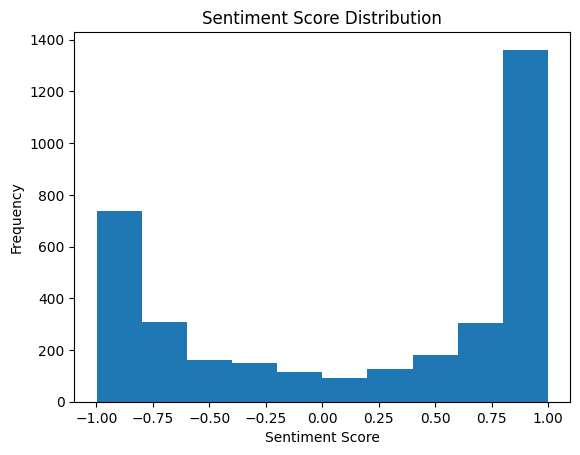

In [15]:
# visual distribution of sentiment scores in a histogram
plt.hist(df_sentiment["sentiment_score"])
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

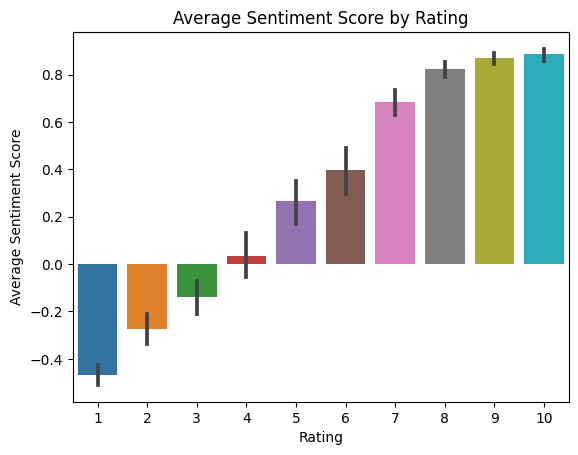

In [16]:
'''bar plot of the average sentiment score for each rating category'''

'''the overall rating should skew towards the direction of the sentiment score.
if the rating is high, the sentiment score should also be high and vice versa'''

# Filter out rows where 'overall rating' is 0
df_sentiment_filtered = df_sentiment[df_sentiment['overall rating'] != 0]

# Create the bar plot
ax = sns.barplot(x="overall rating", y="sentiment_score", data=df_sentiment_filtered)
ax.set_title("Average Sentiment Score by Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Average Sentiment Score")
plt.show()



In [17]:
# categorizing the sentiment as "negative", "neutral", or "positive" based on the value of the score
def map_sentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

df_sentiment['sentiment_category'] = df_sentiment['sentiment_score'].apply(map_sentiment)
df_sentiment.head()

,reviewer,overall rating,comment head,comment body,sentiment_score,sentiment_category
0,Tom Slowbe,4,"""Very disappointed""","The airplanes and the lounges are worn out, ol...",-0.8899,negative
1,E Anderson,1,"""the service was shockingly bad""",One of the worst experiences on the worst airl...,-0.9830,negative
2,C Horden,1,"""Never again will I fly BA""",Cancelled our flight last-minute then moved u...,0.6833,positive
3,P Cooper,1,"""never fly this awful airline again""","I had a flight from Miami, Florida to Dublin, ...",-0.8689,negative
4,Bruce Friedman,1,"""I’ll never fly with them again""",We started our day with BA in Prague. The fli...,-0.9755,negative


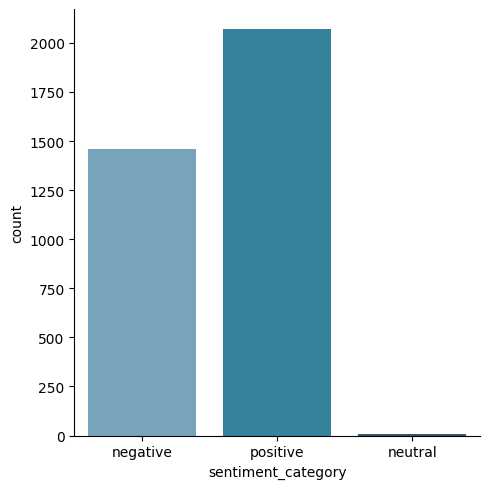

In [18]:
'''to get a clearer picture of the customer sentiment, they are grouped
according to their sentiment score. They are in 3 distinct groups of
positive, neutral and negative. The catplot below is a graphical
representation of the result.'''


sns.catplot(x='sentiment_category', kind='count', data=df_sentiment, palette='PuBuGn_d')

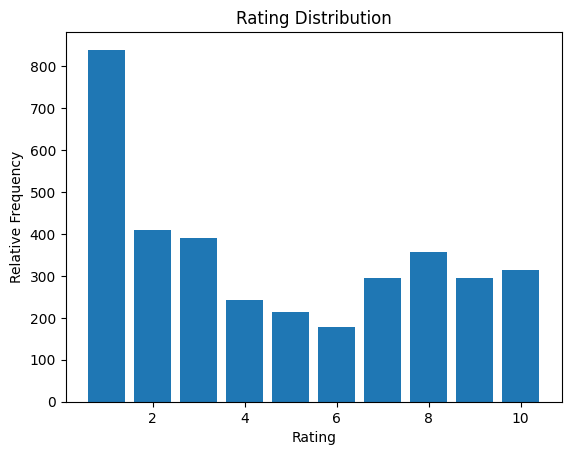

In [19]:
# number of occurrences of each rating value

df_s = df[df['overall rating'] != 0]
rating_distribution = df_s['overall rating'].value_counts()

plt.bar(rating_distribution.index, rating_distribution.values)
plt.xlabel('Rating')
plt.ylabel('Relative Frequency')
plt.title('Rating Distribution')
plt.show()


In [20]:
# relevants columns are selected for sentiment analysis
df_sentiment.head()

,reviewer,overall rating,comment head,comment body,sentiment_score,sentiment_category
0,Tom Slowbe,4,"""Very disappointed""","The airplanes and the lounges are worn out, ol...",-0.8899,negative
1,E Anderson,1,"""the service was shockingly bad""",One of the worst experiences on the worst airl...,-0.9830,negative
2,C Horden,1,"""Never again will I fly BA""",Cancelled our flight last-minute then moved u...,0.6833,positive
3,P Cooper,1,"""never fly this awful airline again""","I had a flight from Miami, Florida to Dublin, ...",-0.8689,negative
4,Bruce Friedman,1,"""I’ll never fly with them again""",We started our day with BA in Prague. The fli...,-0.9755,negative


C:\Users\tunmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


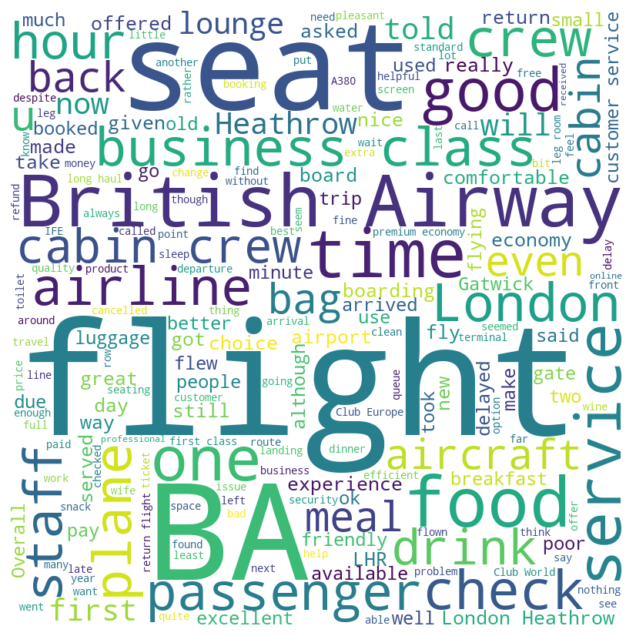

In [26]:
# creating wordcloud
'''wordcloud image. Stop words are removed using NLTK library.'''

stop_words = set(stopwords.words('english'))

reviews = [word for word in df['comment body'] if word not in stop_words]

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(reviews))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Regression analysis is used here to determine the relationship between the independent variables and the dependent variable. It can help identify the extent to which each independent variable affects the dependent variable and determine which independent variable has the most significant impact on the dependent variable.
This information can be useful for the improvement of customer satisfaction by focusing on areas that have the most significant impact on the overall rating given by the customers.

In [27]:
new_df = df[['overall rating', 'seat comfort', 'cabin services', 'food & drink',
       'entertainment', 'ground services', 'value_money', 'recommended']]

'''3 possible target variables are, 'value_money', 'recommended' & 'overall rating'.'''

"3 possible target variables are, 'value_money', 'recommended' & 'overall rating'."

In [28]:
'''identifying which factors have the most significant impact on the overall rating'''
# Multiple Regression Analysis


import numpy as np
import statsmodels.api as sm


X = df[['seat comfort', 'cabin services', 'food & drink',
       'entertainment', 'ground services']]
y = df['overall rating']


# Add a constant to the independent value
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:         overall rating   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     1798.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:23:11   Log-Likelihood:                -6882.1
No. Observations:                3540   AIC:                         1.378e+04
Df Residuals:                    3534   BIC:                         1.381e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9832      0.070    -

In [29]:
'''identifying which factors have the most significant impact on recommendation'''


X = df[['seat comfort', 'cabin services', 'food & drink',
       'entertainment', 'ground services']]
y = df['recommended']


# Add a constant to the independent value
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:            recommended   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     941.0
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:23:11   Log-Likelihood:                -1003.3
No. Observations:                3540   AIC:                             2019.
Df Residuals:                    3534   BIC:                             2056.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3628      0.013    -

In [30]:
'''identifying which factors have the most significant impact on value_money'''



X = df[['seat comfort', 'cabin services', 'food & drink',
       'entertainment', 'ground services']]
y = df['value_money']


# Add a constant to the independent value
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:            value_money   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     1206.
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:23:11   Log-Likelihood:                -4634.9
No. Observations:                3540   AIC:                             9282.
Df Residuals:                    3534   BIC:                             9319.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2334      0.037     

### Build a predictive model to understand factors that influence buying behaviour

In [31]:
# Merge the dataframes


# Assuming df and df_sentiment are your DataFrames
df_merged = pd.merge(df, df_sentiment, how='left', on='reviewer').drop_duplicates(subset=['reviewer'])



df_merged.columns


Index(['reviewer', 'overall rating_x', 'comment head_x', 'comment body_x',
       'aircraft', 'travel type', 'seat type', 'route', 'date flown',
       'seat comfort', 'cabin services', 'food & drink', 'entertainment',
       'ground services', 'value_money', 'recommended', 'overall rating_y',
       'comment head_y', 'comment body_y', 'sentiment_score',
       'sentiment_category'],
      dtype='object')

In [32]:
df_merged.shape

(2752, 21)

In [33]:
# Drop duplicate columns from df_sentiment
df_merged.drop(columns=['overall rating_y', 'comment head_y', 'comment body_y'], inplace=True)

# Rename the remaining column if needed
df_merged.rename(columns={'overall rating_x': 'overall rating', 'comment head_x': 'comment head', 'comment body_x': 'comment body'}, inplace=True)

In [34]:
'''identifying which factors have the most significant impact on sentiment score'''



X = df_merged[['seat comfort', 'cabin services', 'food & drink',
       'entertainment', 'ground services']]
y = df_merged['sentiment_score']


# Add a constant to the independent value
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:        sentiment_score   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     289.2
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          4.37e-249
Time:                        16:23:11   Log-Likelihood:                -2648.3
No. Observations:                2752   AIC:                             5309.
Df Residuals:                    2746   BIC:                             5344.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8395      0.028    -

In [35]:
'''feature selection done to include both the sentiment score and the sentiment category'''

df_2 = df_merged[['reviewer', 'overall rating', 'sentiment_score', 'seat comfort', 'cabin services', 'food & drink',
       'entertainment', 'ground services', 'value_money', 'recommended']]

df_2.head()

,reviewer,overall rating,sentiment_score,seat comfort,cabin services,food & drink,entertainment,ground services,value_money,recommended
0,Tom Slowbe,4,-0.8899,1,4,4,3,3,2,0
1,E Anderson,1,-0.9830,2,1,1,0,1,1,0
2,C Horden,1,0.6833,1,1,1,3,2,1,0
3,P Cooper,1,-0.8689,1,3,2,1,1,1,0
4,Bruce Friedman,1,-0.9755,1,3,3,0,1,1,0


In [36]:
# Split into train (80%), and test (10%)
df_train, df_test = train_test_split(df_2, test_size=0.2, random_state=42)

# Print the shapes of the sets
print("Train set:", df_train.shape)

print("Test set:", df_test.shape)

Train set: (2201, 10)
Test set: (551, 10)


In [37]:
'''model building using Random Forest Classifier'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select features and target
X = df_train.drop(columns=['reviewer', 'recommended'])
y = df_train['recommended']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')



Accuracy: 0.9478458049886621


In [38]:
# Assuming that df_test is your test data
X_test = df_test.drop(columns=['reviewer', 'recommended'])
y_test = df_test['recommended']

# Make predictions on test data
y_pred = model.predict(X_test)

# Create a DataFrame with reviewer, actual and predicted values
df_results = pd.DataFrame({'Reviewer': df_test['reviewer'], 'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame
df_results.head(100)


,Reviewer,Actual,Predicted
5277,J Pang,0,0
1789,Martin Lock,0,0
1358,R Webb,0,0
1043,B Malten,0,0
9954,D Turner,0,0
...,...,...,...
5773,S Humphrey,0,0
143,S Layne,0,0
6024,R Christie,0,0
1711,Léa Chadfeau,0,0


[[356   6]
 [ 10 179]]


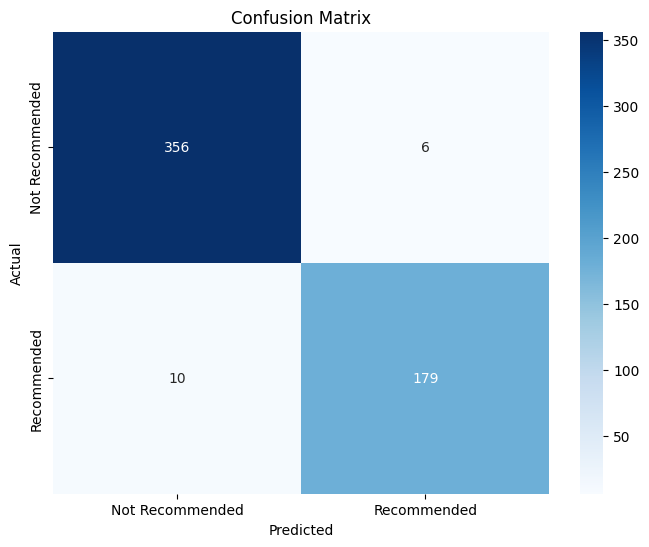

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_results is the DataFrame with reviewer, actual, and predicted values
conf_matrix = confusion_matrix(df_results['Actual'], df_results['Predicted'])
print(conf_matrix)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
